<a href="https://colab.research.google.com/github/daradaaryan/Accuracy-and-Applications-of-Probablistic-Data-Structures/blob/main/CountMinSketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

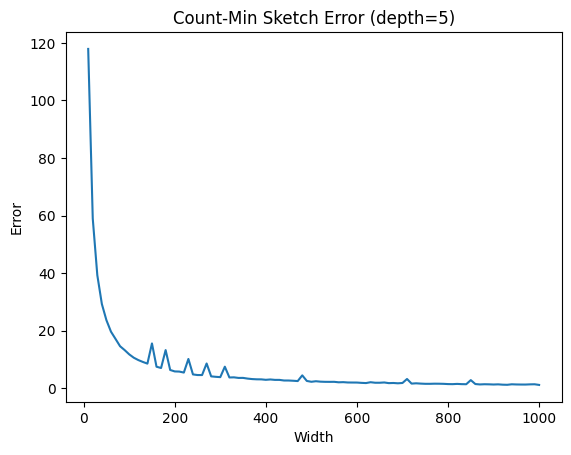

In [ ]:
import random
import math
import matplotlib.pyplot as plt

class CountMinSketch:
    # constructor
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.counts = [[0] * width for _ in range(depth)]
        self.hash_functions = []
        self._initialize_hash_functions()
        self.latest_entries = []
        
    def _initialize_hash_functions(self):
        # Generate 'depth' number of hash functions
        for i in range(self.depth):
            a = random.randint(1, 2**31 - 1)
            b = random.randint(0, 2**31 - 1)
            self.hash_functions.append(lambda x, a=a, b=b: (a*x + b) % self.width)

    def update(self, key, count=1):
        # to add a new data entry
        for i in range(self.depth):
            index = self.hash_functions[i](hash(key))
            self.counts[i][index] += count

        self.latest_entries.append((key, count))
        if len(self.latest_entries) > 10:
            self.latest_entries.pop(0)

    def query(self, key):
        # to find the frequency estimate
        min_count = math.inf
        for i in range(self.depth):
            index = self.hash_functions[i](hash(key))
            count = self.counts[i][index]
            min_count = min(min_count, count)
        return min_count

    def display_latest_entries(self):
        # to show all the current entries
        print("Latest entries:")
        for key, count in self.latest_entries:
            print(f"- {key}: {count}")
    
    def generate_error(self, true_counts):
        # frequency estimate error
        errors = []
        for key, true_count in true_counts.items():
            est_count = self.query(key)
            error = abs(est_count - true_count) / true_count
            errors.append(error)
        return errors

def generate_random_stream(n):
    # function to create a random datastream
    stream = []
    true_counts = {}
    for i in range(n):
        key = str(random.randint(0, n//10))
        count = random.randint(1, 10)
        stream.extend([key] * count)
        true_counts[key] = true_counts.get(key, 0) + count
    return stream, true_counts

# Generate a random stream of items with known frequencies
n = 10000
stream, true_counts = generate_random_stream(n)

# Calculate the true frequencies and store in a dictionary
true_frequencies = {key: stream.count(key) for key in set(stream)}

# Calculate the error for different values of width
widths = list(range(10, 1001, 10))
depth = 5
error_lists = []
for width in widths:
    cms = CountMinSketch(width, depth)
    for item in stream:
        cms.update(item)
    errors = cms.generate_error(true_frequencies)
    avg_error = sum(errors) / len(errors)
    error_lists.append(avg_error)

# Plot the error vs width
plt.plot(widths, error_lists)
plt.title(f"Count-Min Sketch Error (depth={depth})")
plt.xlabel("Width")
plt.ylabel("Error")
plt.show()